# PSD for rest

In [288]:
sampling_frequency= 512   # 31000/60 OR 910000/180

In [289]:
import pyedflib
import numpy as np
import pandas as pd
import os
from scipy.signal import welch

# Path to the EDF files and the CSV file
edf_folder_path = '/Users/ritwikghosh/Downloads/IIT Roorkee Project/eeg-during-mental-arithmetic-tasks-1.0.0/'
csv_file_path = os.path.join(edf_folder_path, 'subject-info.csv')

# Read the CSV file
subject_info = pd.read_csv(csv_file_path)

# Initialize the output DataFrame
columns = ['Subject', 'Channel', 'Trial', 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Label']
psd_df = pd.DataFrame(columns=columns)

def get_avg_psds(freqs, psds):
    FREQ_BANDS = {"delta": [1, 4.0],
                  "theta": [4.0, 8.0],
                  "alpha": [8.0, 12.0],
                  "beta": [12.0, 30.0],
                  "gamma": [30.0, 100.0]}

    psds_bands = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_slice = psds[(freqs >= fmin) & (freqs < fmax)]
        if len(psds_slice) > 0:
            psds_band = psds_slice.mean()
        else:
            psds_band = 1  # or any other value you prefer for empty slices
        psds_bands.append(psds_band)

    abs_psds = np.array(psds_bands)  # Absolute band values
    return abs_psds

# Process each subject and their trials
psd_records = []
for i in range(36):
    subject_name = f'Subject{i:02d}'
    label = subject_info[subject_info['Subject'] == subject_name]['Count quality'].values[0]
    
    for trial in range(1, 2):
        edf_file_name = f'{subject_name}_{trial}.edf'
        edf_file_path = os.path.join(edf_folder_path, edf_file_name)
        
        # Open the EDF file
        data = pyedflib.EdfReader(edf_file_path)
        signal_labels = data.getSignalLabels()
        
        # Read the signals data
        for j in range(19):  # Only the first 19 channels
            signal_data = data.readSignal(j)
            
            # Calculate the PSD using Welch's method
            freqs, psds = welch(signal_data, fs=sampling_frequency)  # Adjust fs and nperseg as needed
            
            # Get average PSD values for each frequency band
            avg_psds = get_avg_psds(freqs, psds)
            
            # Append the data to the list of records
            psd_records.append({
                'Subject': subject_name,
                'Channel': signal_labels[j][4:],
                'Trial': trial,
                'Delta': avg_psds[0],
                'Theta': avg_psds[1],
                'Alpha': avg_psds[2],
                'Beta': avg_psds[3],
                'Gamma': avg_psds[4],
                'Label': label
            })
        
        # Close the EDF file
        data.close()

# Convert the list of records to a DataFrame
psd_df_rest = pd.DataFrame(psd_records, columns=columns)

# Save the DataFrame to a CSV file
output_csv_path = os.path.join(edf_folder_path, 'psd_values_with_labels_rest.csv')
psd_df_rest.to_csv(output_csv_path, index=False)

print(f"PSD values with labels saved to {output_csv_path}")


PSD values with labels saved to /Users/ritwikghosh/Downloads/IIT Roorkee Project/eeg-during-mental-arithmetic-tasks-1.0.0/psd_values_with_labels_rest.csv


# PSD for task

In [290]:
import pyedflib
import numpy as np
import pandas as pd
import os
from scipy.signal import welch

# Path to the EDF files and the CSV file
edf_folder_path = '/Users/ritwikghosh/Downloads/IIT Roorkee Project/eeg-during-mental-arithmetic-tasks-1.0.0/'
csv_file_path = os.path.join(edf_folder_path, 'subject-info.csv')

# Read the CSV file
subject_info = pd.read_csv(csv_file_path)

# Initialize the output DataFrame
columns = ['Subject', 'Channel', 'Trial', 'Delta', 'Theta', 'Alpha', 'Beta', 'Gamma', 'Label']
psd_df = pd.DataFrame(columns=columns)

def get_avg_psds(freqs, psds):
    FREQ_BANDS = {"delta": [1, 4.0],
                  "theta": [4.0, 8.0],
                  "alpha": [8.0, 12.0],
                  "beta": [12.0, 30.0],
                  "gamma": [30.0, 100.0]}

    psds_bands = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_slice = psds[(freqs >= fmin) & (freqs < fmax)]
        if len(psds_slice) > 0:
            psds_band = psds_slice.mean()
        else:
            psds_band = 1  # or any other value you prefer for empty slices
        psds_bands.append(psds_band)

    abs_psds = np.array(psds_bands)  # Absolute band values
    return abs_psds

# Process each subject and their trials
psd_records = []
for i in range(36):
    subject_name = f'Subject{i:02d}'
    label = subject_info[subject_info['Subject'] == subject_name]['Count quality'].values[0]
    
    for trial in range(2, 3):
        edf_file_name = f'{subject_name}_{trial}.edf'
        edf_file_path = os.path.join(edf_folder_path, edf_file_name)
        
        # Open the EDF file
        data = pyedflib.EdfReader(edf_file_path)
        signal_labels = data.getSignalLabels()
        
        # Read the signals data
        for j in range(19):  # Only the first 19 channels
            signal_data = data.readSignal(j)
            
            # Calculate the PSD using Welch's method
            freqs, psds = welch(signal_data, fs=sampling_frequency)  # Adjust fs and nperseg as needed
            
            # Get average PSD values for each frequency band
            avg_psds = get_avg_psds(freqs, psds)
            
            # Append the data to the list of records
            psd_records.append({
                'Subject': subject_name,
                'Channel': signal_labels[j][4:],
                'Trial': trial,
                'Delta': avg_psds[0],
                'Theta': avg_psds[1],
                'Alpha': avg_psds[2],
                'Beta': avg_psds[3],
                'Gamma': avg_psds[4],
                'Label': label
            })
        
        # Close the EDF file
        data.close()

# Convert the list of records to a DataFrame
psd_df_task = pd.DataFrame(psd_records, columns=columns)

# Save the DataFrame to a CSV file
output_csv_path = os.path.join(edf_folder_path, 'psd_values_with_labels_rest.csv')
psd_df_task.to_csv(output_csv_path, index=False)

print(f"PSD values with labels saved to {output_csv_path}")


PSD values with labels saved to /Users/ritwikghosh/Downloads/IIT Roorkee Project/eeg-during-mental-arithmetic-tasks-1.0.0/psd_values_with_labels_task.csv


In [291]:
mean_psd_task = psd_df_task[['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']].mean()
mean_psd_rest = psd_df_rest[['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']].mean()

In [292]:
mean_psd_task

Delta    9.318561
Theta    4.403729
Alpha    4.576662
Beta     1.131876
Gamma    0.032598
dtype: float64

In [293]:
mean_psd_rest

Delta    8.600573
Theta    4.571598
Alpha    7.143728
Beta     1.448901
Gamma    0.027531
dtype: float64

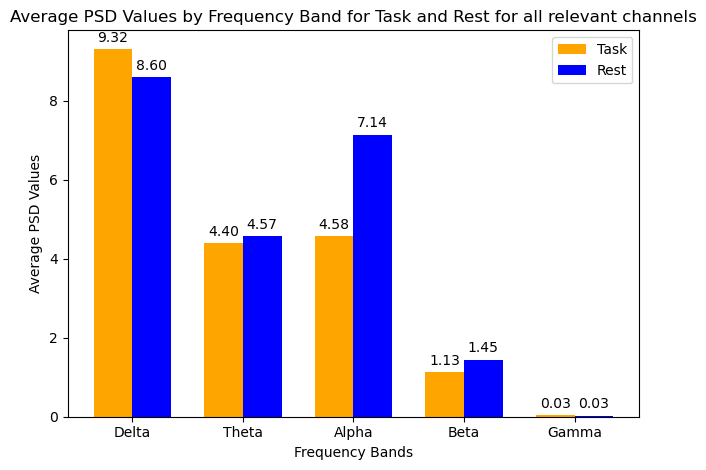

In [294]:
import matplotlib.pyplot as plt

# Assuming psd_df_task and psd_df_rest are already loaded DataFrames with the specified columns

# Create a bar plot
labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_psd_task, width, label='Task', color='orange')
rects2 = ax.bar(x + width/2, mean_psd_rest, width, label='Rest', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Frequency Bands')
ax.set_ylabel('Average PSD Values')
ax.set_title('Average PSD Values by Frequency Band for Task and Rest for all relevant channels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add bar labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



# Rest mode values are greater than task mode for most bands

In [241]:
psd_df_rest.columns

Index(['Subject', 'Channel', 'Trial', 'Delta', 'Theta', 'Alpha', 'Beta',
       'Gamma', 'Label'],
      dtype='object')

In [242]:
psd_df_rest['Channel'].unique()

array(['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'Cz', 'Pz'], dtype=object)

In [244]:
psd_df_task=pd.read_csv('/Users/ritwikghosh/Downloads/IIT Roorkee Project/eeg-during-mental-arithmetic-tasks-1.0.0/psd_values_with_labels_task.csv')
psd_df_rest=pd.read_csv('/Users/ritwikghosh/Downloads/IIT Roorkee Project/eeg-during-mental-arithmetic-tasks-1.0.0/psd_values_with_labels_rest.csv')



# Classifying rest and task mode from PSD values

In [245]:
psd_df_task['Label'] = 1
psd_df_rest['Label'] = 0

# List of unique channels
channels = ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'T3', 'T4', 'C3', 'C4', 'T5', 'T6', 'P3', 'P4', 'O1', 'O2', 'Fz', 'Cz', 'Pz']

# Function to pivot the dataframe
def pivot_dataframe(df):
    df_pivot = df.pivot(index=['Subject', 'Trial', 'Label'], columns='Channel', values=['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma'])
    df_pivot.columns = [f"{chan}_{freq}" for freq, chan in df_pivot.columns]
    df_pivot.reset_index(inplace=True)
    return df_pivot

# Pivot both dataframes
psd_df_task_pivot = pivot_dataframe(psd_df_task)
psd_df_rest_pivot = pivot_dataframe(psd_df_rest)

# Concatenate the dataframes
final_df = pd.concat([psd_df_task_pivot, psd_df_rest_pivot], ignore_index=True)

In [248]:
final_df.drop(columns=['Subject', 'Trial'], axis=1, inplace =True)

# Random Forest Model Used to classify

In [295]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepare the features and labels
X = final_df.drop(columns=['Label'])
y = final_df['Label']

# Initialize the Random Forest Classifier with random state for reproducibility
rf_model = RandomForestClassifier(random_state=0)
# Perform 10-fold cross-validation for more robust evaluation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores (5-fold):", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)


Cross-Validation Scores (5-fold): [0.66666667 0.73333333 0.85714286 0.85714286 0.78571429]
Mean Cross-Validation Score: 0.78


# Looks like Fp1 Channel plays a major role in arithmatic task.
Even many literature says frontal lobe in crutial for logical thinking.

/var/folders/hv/qjk6fc2s1fs49rwrghx0sb8r0000gn/T/ipykernel_92677/2383305474.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (e.g., 'tab10', 'viridis')


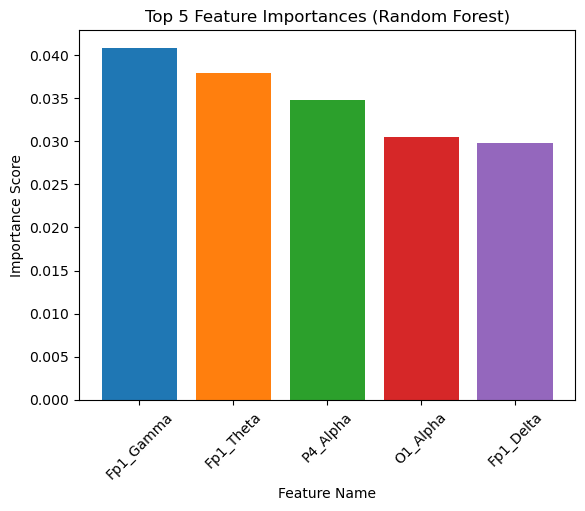

In [302]:
rf_model.fit(X, y)

# Get feature importances and feature names
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Define the number of top features to plot (adjust as needed)
top_n_features = 5  # You can change this value

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Select top n features and their importances
top_features = feature_names[sorted_idx[:top_n_features]]
top_importances = feature_importances[sorted_idx[:top_n_features]]

# Create a color list for the bars (adjust as needed)
num_bars = len(top_features)  # Get the number of bars to plot
cmap = plt.cm.get_cmap('tab10')  # Choose a colormap (e.g., 'tab10', 'viridis')
colors = cmap(np.arange(num_bars) % cmap.N)  # Generate unique colors

# Create the bar chart of top feature importances
plt.bar(top_features, top_importances, color=colors)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.title(f"Top {top_n_features} Feature Importances (Random Forest)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()
